Data exploration and cleaning

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('bi.csv', encoding='unicode_escape')
df["gender"] = df["gender"].replace(['female', 'F','f'], 'Female')
df["gender"] = df["gender"].replace(['male', 'M', 'm'], 'Male')
df = df.dropna()
df["Python"] = (df["Python"] > 50).astype(int)
df["DB"]     = (df["DB"] > 50).astype(int)
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,1,1
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,1,1
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,1,0
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,1,1
5,Hannah,Hansen,25,Female,Norge,BI Residence,66,High School,130,1,1


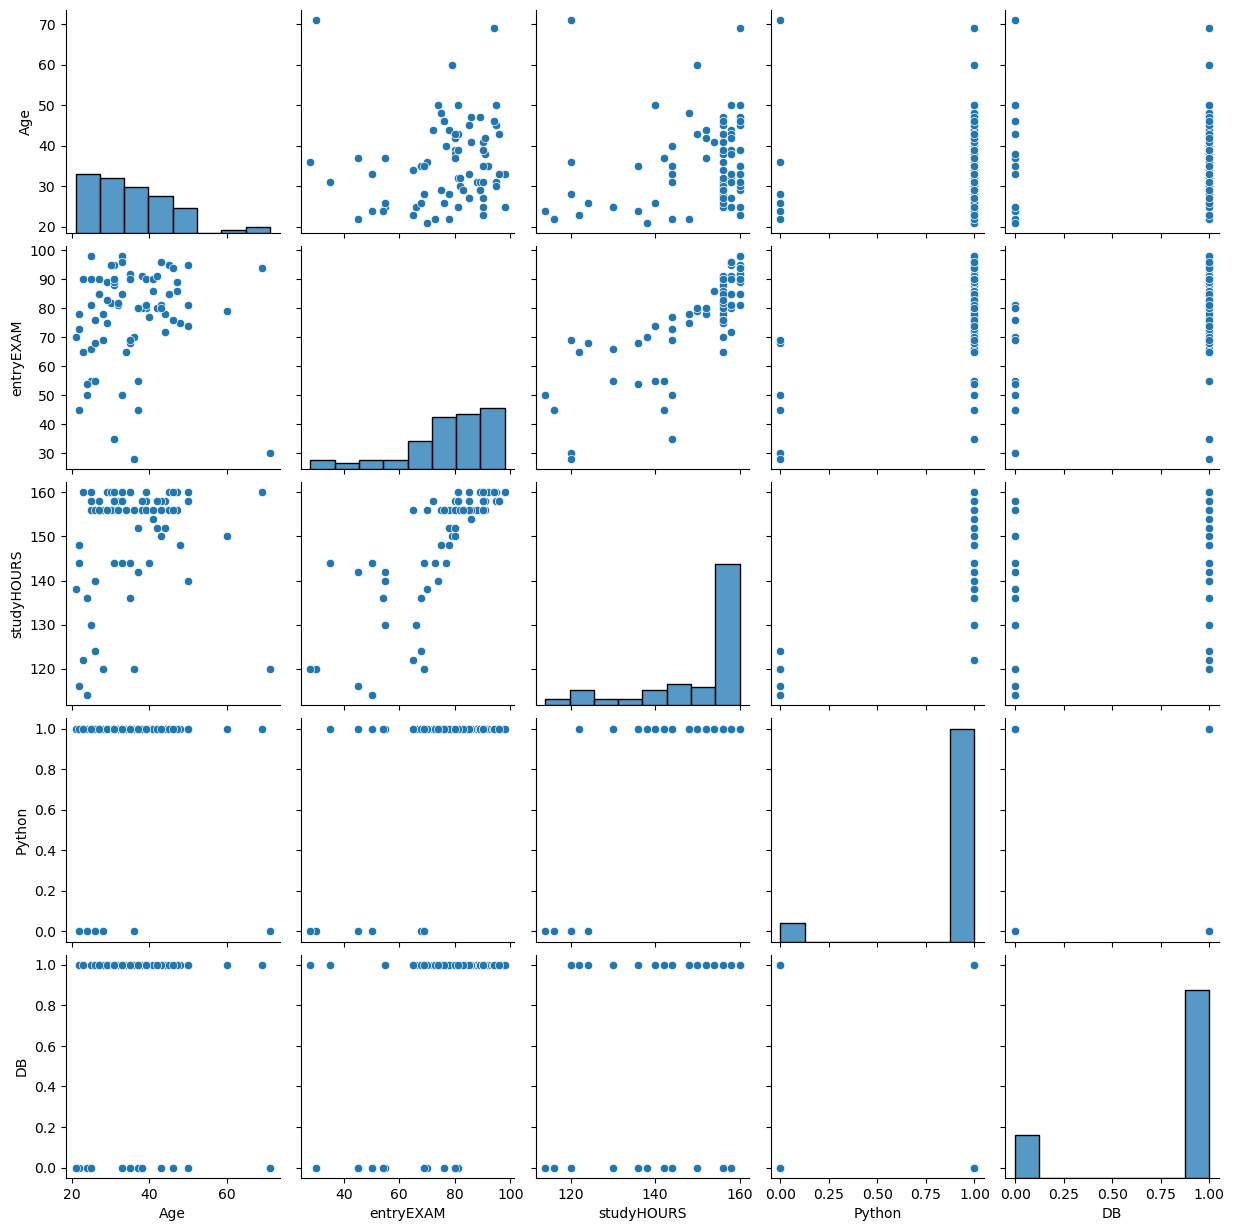

In [62]:
sns.pairplot(df)

Text(0.5, 1.0, 'Number of Students from different countries')

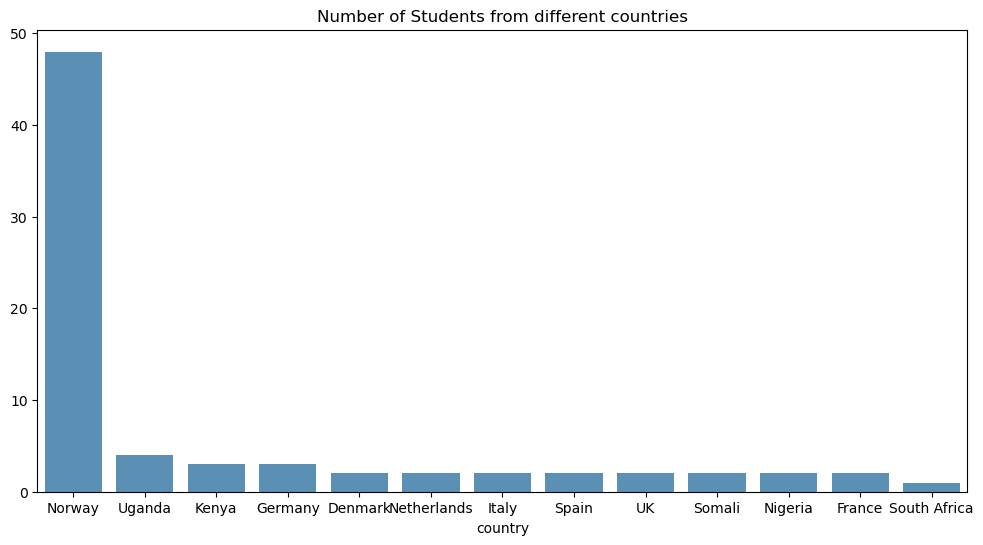

In [63]:
df["country"] = df["country"].replace(['norway', 'norge', 'Norge'], 'Norway')
country_Count = df["country"].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=country_Count.index, y=country_Count.values, alpha=0.8)
plt.title('Number of Students from different countries')

In [ ]:
df["prevEducation"] = df["prevEducation"].replace(['Highschool', 'highschool', 'HighSchool'], 'High School')
df["prevEducation"] = df["prevEducation"].replace(['Barrrchelors'], 'Bachelors')
df["prevEducation"] = df["prevEducation"].replace(['diploma','DIPLOMA','Diplomaaa'], 'Diploma')
df["prevEducation"].value_counts()
df = pd.get_dummies(df, columns=["prevEducation"], dtype=int)


KeyError: 'prevEducation'

In [77]:
df_no_name = df.drop(columns=["fNAME", "lNAME"])
df

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,studyHOURS,Python,DB,prevEducation_Bachelors,prevEducation_Diploma,prevEducation_Doctorate,prevEducation_High School,prevEducation_Masters
0,Christina,Binger,44,Female,Norway,Private,72,158,1,1,0,0,0,0,1
1,Alex,Walekhwa,60,Male,Kenya,Private,79,150,1,1,0,1,0,0,0
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,130,1,0,0,0,0,1,0
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,122,1,1,0,0,0,1,0
5,Hannah,Hansen,25,Female,Norway,BI Residence,66,130,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,43,Female,France,Private,80,150,1,0,1,0,0,0,0
73,Julian,Nielsen,31,Male,Denmark,Sognsvann,90,158,1,1,0,0,0,0,1
74,Sophie,Brown,33,Female,UK,Sognsvann,96,158,1,1,0,0,0,0,1
75,Leon,Bauer,35,Male,Germany,Sognsvann,90,160,1,1,0,0,0,0,1


In [86]:
features = df_no_name.drop(columns=["country","residence","gender","Python","DB"])
labels = df_no_name["DB"]
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#we use the train features to see how the model performs in K folds
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
labels
labels.value_counts()


DB
1    61
0    14
Name: count, dtype: int64

Mean Squared Error for 5 folds: 0.03333333333333333
Mean Squared Error for 6 folds: 0.03333333333333333
Mean Squared Error for 7 folds: 0.03333333333333333
Mean Squared Error for 8 folds: 0.03333333333333333
Mean Squared Error for 10 folds: 0.03333333333333333
Mean Squared Error for 12 folds: 0.03333333333333333
Mean Squared Error for 15 folds: 0.03333333333333333
Mean Squared Error for 20 folds: 0.03333333333333333
Mean Squared Error for 25 folds: 0.03333333333333333


Text(0.5, 0, 'Number of Folds')

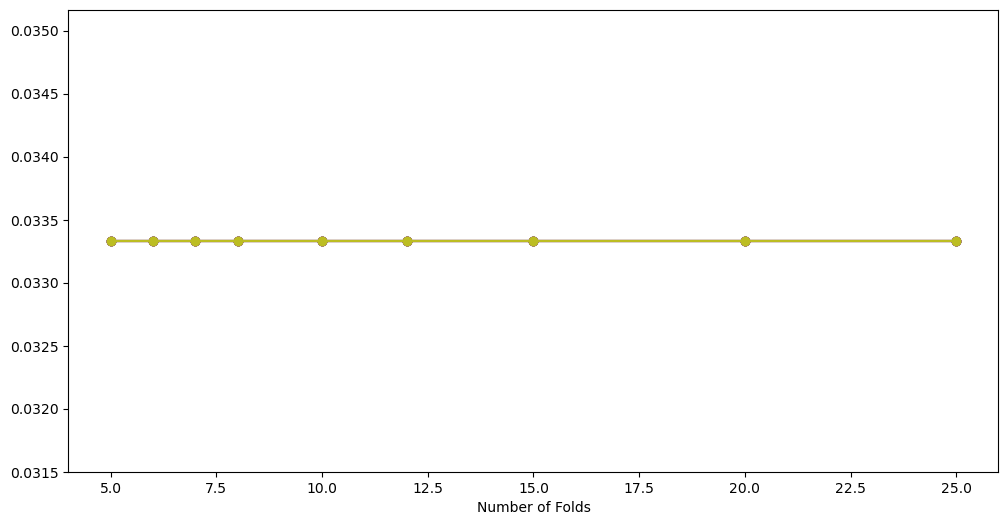

In [82]:
#Finding the K with lowest MSE
def kfoldmodel(features,target, splits):
    y_pred = []
    y_true = []
    model = LogisticRegression(max_iter = 1000)
    kf = KFold(n_splits=splits, shuffle=True,random_state=42)
    for i, (train_index, test_index) in enumerate(kf.split(features)):
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        model.fit(X_train, y_train)
        y_hat = model.predict(X_test)   
        y_true.extend(y_test.values)
        y_pred.extend(y_hat)     
    mse = mean_squared_error(y_true, y_pred)
    return mse
folds = [5,6,7,8,10,12,15,20,25]
mses = []
plt.figure(figsize=(12,6))
for fold in folds:
    mse = kfoldmodel(X_train, y_train, fold)
    mses.append(mse)
    print(f'Mean Squared Error for {fold} folds: {mse}')
    plt.plot(folds, [kfoldmodel(X_train, y_train, f) for f in folds], marker='o')
plt.xlabel('Number of Folds')
    

Accuracy for 5 folds: 0.783
Accuracy for 6 folds: 0.783
Accuracy for 7 folds: 0.783
Accuracy for 8 folds: 0.783
Accuracy for 10 folds: 0.783
Accuracy for 12 folds: 0.783
Accuracy for 15 folds: 0.800
Accuracy for 20 folds: 0.800
Accuracy for 25 folds: 0.783


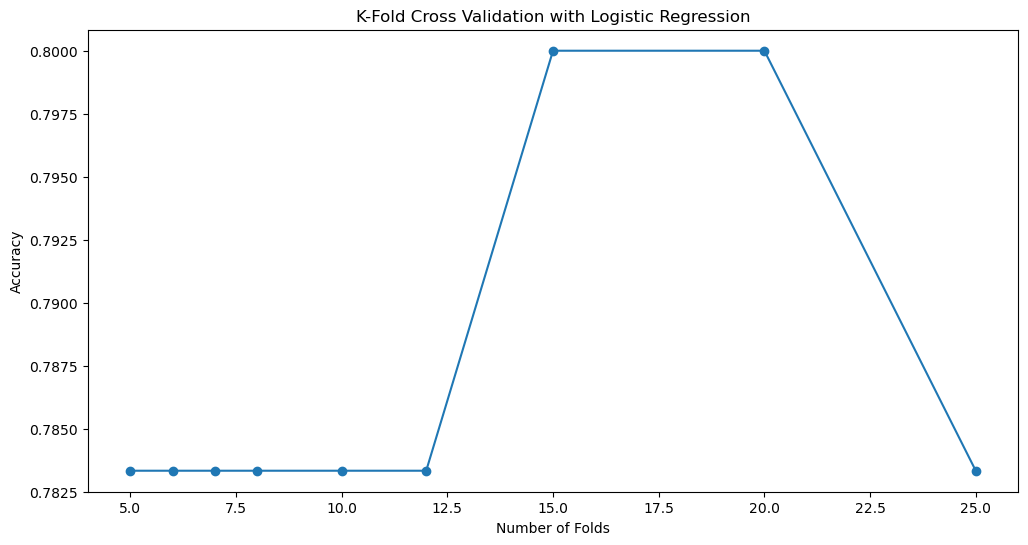

In [87]:
def kfoldmodel(features, target, splits):
    y_pred = []
    y_true = []
    model = LogisticRegression(max_iter=1000)
    kf = KFold(n_splits=splits, shuffle=True, random_state=42)
    
    for train_index, test_index in kf.split(features):
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_hat = model.predict(X_test)   
        
        y_true.extend(y_test.values)
        y_pred.extend(y_hat)     
    
    acc = accuracy_score(y_true, y_pred)
    return acc

folds = [5,6,7,8,10,12,15,20,25]
scores = []

plt.figure(figsize=(12,6))
for fold in folds:
    acc = kfoldmodel(X_train, y_train, fold)
    scores.append(acc)
    print(f'Accuracy for {fold} folds: {acc:.3f}')

plt.plot(folds, scores, marker='o')
plt.xlabel('Number of Folds')
plt.ylabel('Accuracy')
plt.title('K-Fold Cross Validation with Logistic Regression')
plt.show()

In [60]:
from sklearn.model_selection import cross_val_score
import numpy as np
import statsmodels.api as sm
#K=8 seems to be a good choice
def cross_val_statsmodels(X, y, splits):
    kf = KFold(n_splits=splits, shuffle=True, random_state=42)
    all_coefs = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        X_train_const = sm.add_constant(X_train)
        model = sm.OLS(y_train, X_train_const).fit()
        
        # collect coefficients + p-values
        all_coefs.append(pd.DataFrame({
            "Feature": ["Intercept"] + list(X.columns),
            "Coef": model.params.values,
            "P-value": model.pvalues.values
        }))
    
    # average results across folds
    results = pd.concat(all_coefs).groupby("Feature").mean().reset_index()
    return results

results = cross_val_statsmodels(X_train, y_train, splits=8)
print(results)

                       Feature          Coef   P-value
0                          Age -1.655409e-03  0.674687
1                    Intercept -2.220200e+00  0.000047
2                    entryEXAM -4.881003e-03  0.138404
3      prevEducation_Bachelors -3.259170e-01  0.002959
4   prevEducation_Barrrchelors -3.872662e-01  0.021115
5        prevEducation_DIPLOMA -2.763160e-01  0.081190
6        prevEducation_Diploma -2.754377e-01  0.012160
7      prevEducation_Diplomaaa  3.353351e-17  0.259437
8      prevEducation_Doctorate -4.335540e-01  0.007462
9    prevEducation_High School -2.681889e-01  0.003200
10    prevEducation_HighSchool  1.313559e-01  0.384229
11       prevEducation_Masters -3.848765e-01  0.001256
12       prevEducation_diploma  0.000000e+00       NaN
13                  studyHOURS  2.595238e-02  0.000001
